# Web scraping para compra de imóveis na empresa Julio Bogoricin

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import bs4
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = "{:,.2f}".format

In [164]:
def tabela(h):
    valor = []
    quartos = []
    area = []
    bairro = []
    vagas = []
    suites = []
    link = []
    julio = 'https://www.juliobogoricin.com'
    descricao = []
    for i in h:
        x = str(i.find_all('button'))
        y = str(i.find_all('span'))
        z = str(i.find_all('h2'))
        k = str(i.find_all('a'))
        q = str(i.find_all('p'))
        valor.append(float(x.split('R$')[1].replace(u'\xa0', '').split(',')[0].replace('.','')))
        quartos.append(int(y.split('quarto')[0].split('>')[1].replace(' ','')))
        area.append(float(y.split('</span>')[-2].split('>')[-1].replace(' m²','')))
        bairro.append(z.split('"title-bairro">')[-1].split('</h2>')[0])
        vagas.append(int(y.split('vaga(s)</span>')[-2].split('</span>')[-1].split('<span>')[-1].replace(' ','')))
        suites.append(int(y.split('suíte(s)</span>')[0].split('</span>')[-1].split('<span>')[-1].replace(' ','')))
        link.append(julio+k.split('>\n<img')[0].split('href=')[-1][1:-1])
        descricao.append(q.split('"descr">')[-1])
    df = pd.DataFrame([valor,quartos,area,bairro,vagas,suites,link,descricao]).T
    df.columns = ['Valor (R$)','Quartos','Área','Bairro','Vagas','Suites','Link','Descrição']
    return df

In [176]:
def web_control(url):
    final = []
    for i in range(1,188):
        urlq = url + str(i)
        page = requests.get(urlq)
        soup = BeautifulSoup(page.content, 'html.parser')
        h = soup.find_all('div', class_="imovel-busca-thumb")
        final.append(tabela(h))
    dfinal = pd.concat(final)
    dfinal.to_csv('PrecosJulioBogoricinRJ.csv')
    return dfinal

In [177]:
urlq = 'https://www.juliobogoricin.com/imoveis/busca/?tipo=residencial&entity=comprar&subcategoria=3&bairro=&codigo=&faixaPrecoDe=&faixaPrecoAte=&areaDe=&areaAte=&page='

In [179]:
df = web_control(urlq)

In [327]:
dff = df.copy()

In [328]:
dff['Valor (R$)'] = pd.to_numeric(dff['Valor (R$)'])
dff['Quartos'] = pd.to_numeric(dff['Quartos'])
dff['Área'] = pd.to_numeric(dff['Área'])
dff['Vagas'] = pd.to_numeric(dff['Vagas'])
dff['Suites'] = pd.to_numeric(dff['Suites'])

In [329]:
dff.dtypes

Valor (R$)    float64
Quartos       int64  
Área          float64
Bairro        object 
Vagas         int64  
Suites        int64  
Link          object 
Descrição     object 
dtype: object

In [330]:
dff['Preço/m² (R$)'] = dff['Valor (R$)']/dff['Área']

## Análise exploratória 

In [332]:
dff1 = dff[dff['Área']>0]

In [333]:
dff1.head()

,Valor (R$),Quartos,Área,Bairro,Vagas,Suites,Link,Descrição,Preço/m² (R$)
0,"1,850,000.00",3,106.00,Lagoa,1,2,https://www.juliobogoricin.com/imoveis/ipanema/lagoa-3quartos-reformado-2suites-dependencias-vaga-na-escritura-juliobogoricin/,"Apartamento totalmente reformado e com extremo bom gosto, fundos, silêncioso, sol da manhã, composto de ampla sala e cozinha gourmet integradas, armários em todos os cômodos, três quartos sendo duas suítes, banheiro social, área de serviço e banheiro de empregada. Uma vaga na escritura, prédio com portaria 24h próximo a uma das maiores e melhores áreas de lazer da cidade com fácil deslocamento e transporte.Oportunidade!</p>]","17,452.83"
1,"850,000.00",3,162.00,Glória,0,0,https://www.juliobogoricin.com/imoveis/ipanema/gloria-estilo-loft-nova-york-imovel-diferenciado-com-sala-03-quartos-cozinha-americana-juliobogoricin/,"Situado no bairro da Gloria, junto a Imperial Igreja Nossa Senhora da Glória. Imóvel com estilo para clientes descolados. Andar térreo (2,5 m de altura do nível da rua) com mezanino, interior em paredes de tijolos aparentes, madeira e pedras. 1º piso: hall, ampla sala, cozinha americana, espaço adequado para escritório / home office ou estúdio, banheiro social. quarto vista frontal p/ o mar e parcial para o Aterro do Flamengo e Niterói. 2º piso: salão com 38m², lavabo, depósito, vista lateral para o Aterro do Flamengo e Niterói. Recém reformado.Aceita permuta na Zona Sul.</p>]","5,246.91"
2,"650,000.00",3,88.00,Recreio dos Bandeirantes,2,1,https://www.juliobogoricin.com/imoveis/recreio/recreio-praia-varandao-gourmet-3-quartos-1-suite-88m2-2-vagas-venda/,Excelente apartamento 2ª quadra da praia varandão gourmet com churrasqueira e armários sala toda em porcelanato em 2 ambientes 3 quartos ( 1 suite ) com armários cozinha planejada wc de empregada prédio de alto luxo.\r\nRevisado 11/06/2020.</p>],"7,386.36"
3,"525,000.00",3,82.00,Recreio dos Bandeirantes,2,1,https://www.juliobogoricin.com/imoveis/recreio/recreio-california-coast-3-quartos-1-suite-todo-montado-total-infra-estrutura-lazer-oportunidade/,Recreio California Coast excelente apartamento varanda sala em 2 ambientes 3 quartos ( 1 suite ) todo montado com armários cozinha planejada condomínio com total infra estrutura lazer segurança 24 horas OPORTUNIDADE!!!!!!\r\n Revisado 11/06/2020.</p>],"6,402.44"
4,"450,000.00",2,87.00,Recreio dos Bandeirantes,1,1,https://www.juliobogoricin.com/imoveis/recreio/recreio-ivo-borges-2-quartos-1suite-87m2-1-vaga-venda-jbrb212262/,"Ótimo Apartamento fundos, Gleba B, 2 andar, Próximo Comercio, 2 quartos c/ 3 revertido, 1 vaga de garagem. \r\nComposto por: Sacada, sala 2 ambientes,2 quartos com 3 revertido, sendo 1 suíte, cozinha com armários.\r\nO Recreio dos Bandeirantes é um dos melhores bairros da Cidade Rio de Janeiro, para se viver e investir.\r\nUm bairro jovem com grande potencial de valorização dos imóveis em função da sua urbanização diferenciada, cujo o balizamento foi respeitar as reservas naturais e a vegetação nativa. Com muitos parques, praças e 8 km de praias de águas límpidas e transparentes. \r\nEncontramos no Recreio dos Bandeirantes uma grande diversidade de serviços, assim como um comércio variado e de qualidade. \r\nAlém de Shoppings Centers e galerias comerciais, cinemas, restaurantes famosos e bares badalados, o bairro oferece inúmeras opções de lazer \r\nConta com excelentes colégios, cursos, academias, creches , clinicas medicas, e ótimos hospitais.\r\nPodemos afirmar que o Recreio é um bairro completo.\r\nFacilidade de acesso para vários ponto da cidade, com vias expressas, diversas linhas de ônibus além do BRT.\r\nEstuda financiamento da Caixa de Econômica Federal.\r\nRevisado 11/06/2020.</p>]","5,172.41"


### Médias de valores de imóvel por metro quadrado

In [247]:
dff1.groupby('Bairro')['Preço/m² (R$)'].mean().nlargest(7)

Bairro
Leblon                22,426.27
Ipanema               20,568.82
Lagoa                 17,025.47
Gávea                 15,436.78
Jardim Botânico       15,337.23
Urca                  14,398.77
Copacabana, Posto 6   13,463.27
Name: Preço/m² (R$), dtype: float64

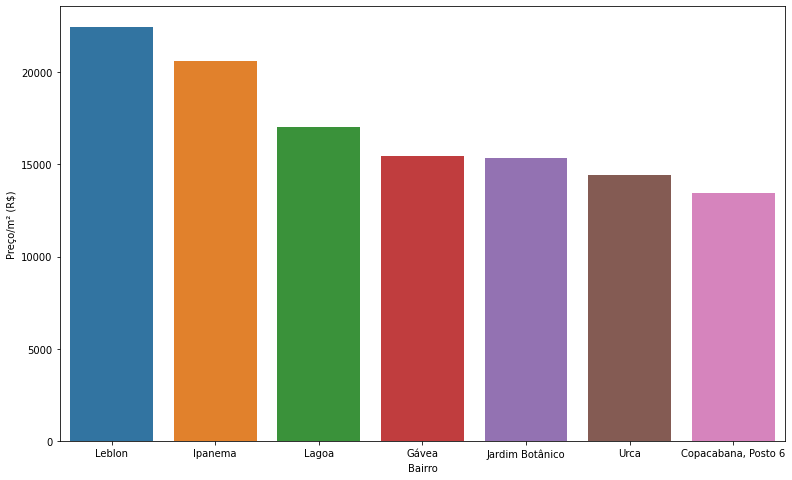

In [335]:
plt.figure(figsize=(13,8))
x = dff1.groupby('Bairro')['Preço/m² (R$)'].mean().nlargest(7).index
y = dff1.groupby('Bairro')['Preço/m² (R$)'].mean().nlargest(7)
sns.barplot(x,y)
plt.show()

### Criando função para obter valores menores ou iguais em um bairro selecionado pelo usário

In [336]:
def escolha(dff1,x,y):
    return dff1[(dff1['Bairro'] == x) & (dff1['Valor (R$)']<=y)]

### Escolhi Copacabana como referência e valor menor do que R$ 400000

In [337]:
cop = escolha(dff1,'Copacabana',400000)

### Verei o que possui menor valor por metro quadrado

In [338]:
cop[cop['Preço/m² (R$)'] == cop['Preço/m² (R$)'].min()]

,Valor (R$),Quartos,Área,Bairro,Vagas,Suites,Link,Descrição,Preço/m² (R$)
45,"330,000.00",1,38.00,Copacabana,0,0,https://www.juliobogoricin.com/imoveis/copacabana/copacabana-rua-siqueira-campos-portaria-24-horas-jbc100335/,"Copacabana - JBC100335\r\n\r\nDois em um, Rua Siqueira Campos - Copacabana, Posto 4, prédio misto, segunda quadra da praia, há pouquíssimos metros do Metrô, lugar onde você possui absolutamente tudo à mão. Prédio Misto, com possibilidades para vários ramos comerciais. Planta muito bem distribuída Sala, banheiro, quarto, cozinha com armários planejados. Portaria 24 horas com câmeras de segurança. Não perca esta chance!\r\n\r\n- No IPTU são 38 m², na medição aponta 43 m².\r\n\r\n- Nosso horário de atendimento é de segunda a sexta-feira das 8h às 19h e sábado das 8 às 18h. Domingos e feriados das 8h às 16h.</p>]","8,684.21"


## Análise de grandes oportunidades (Será?)

Estabeleci como uma grande oportunidade, num determinado bairro, os imóveis com preço por metro quadrado menores do que o valor da média menos dois desvios padrões. Não estão sendo considerados fatores muito importantes na determinação da oportunidade, como o estado físico do imóvel (precisa de reformas?), o estado jurídico (está em penhora ou inventário?) e a localização precisa (tem comércio perto, shoppings, metrô...). Esses fatores devem ser considerados

In [339]:
def oportunidade(dff1,bairro,n=1,quartos=1,vagas=0,suites=0):
    x = dff.groupby('Bairro')['Preço/m² (R$)'].mean()
    y = dff.groupby('Bairro')['Preço/m² (R$)'].std()
    xx = pd.DataFrame(x).reset_index()
    yy = pd.DataFrame(y).reset_index()
    f = xx[xx['Bairro']==bairro]['Preço/m² (R$)']
    ff = yy[yy['Bairro']==bairro]['Preço/m² (R$)']
    y = dff[(dff['Bairro']==bairro) & (dff['Quartos']==quartos) & (dff['Vagas']==vagas) & (dff['Suites']==suites) & (dff['Preço/m² (R$)']<f.values[0] - n*ff.values[0])]
    return y

Oportunidade em Botafogo, 1 quarto e 1 desvio-padrão abaixo da média

In [341]:
oportunidade(dff1,'Botafogo',1)

,Valor (R$),Quartos,Área,Bairro,Vagas,Suites,Link,Descrição,Preço/m² (R$)
16,"380,000.00",1,58.00,Botafogo,0,0,https://www.juliobogoricin.com/imoveis/botafogo/praia-de-botafogo-apartamento-quarto-e-sala-tipo-casa-terreo-jbbot-12330/,"Praia de Botafogo, próximo ao metro, shopping, comércio. Apartamento tipo casa, térreo, sala retangular, banheiro social espaçoso, 01 quarto, cozinha com bancada, área externa espaçosa. Prédio com entrada suntuosa e portaria 24h.. Doc ok. Desocupado, visite.</p>]","6,551.72"
46,"440,000.00",1,51.00,Botafogo,0,0,https://www.juliobogoricin.com/imoveis/botafogo/botafogo-rua-assis-bueno-sol-manha-1-quarto-perto-de-escola-supermercado-zona-sul-restaurantes-vista-livre-area-externa-jbbot-12/,"LOCALIZAÇÃO PRIVILEGIADA,,PERTO DE COMÉRCIO,ESCOLA,RESTAURANTES,ÓTIMO APTO QUARTO/SALA,VISTA LIVRE,SILENCIOSO,AREJADO,PISO FRIO,,COM SALA 2 AMBIENTES E VENTILADOR DE TETO ,QUARTO COM ARMÁRIO E VENTILADOR DE TETO,BANHEIRO SOCIAL COM PIA EM BANCADA DE GRANITO E ARMÁRIO,COZINHA AMPLA COM ARMÁRIO,ÁREA DE SERVIÇO E TEM UMA ÁREA EXTERNA EXCLUSIVA DE 5 M. ,2 LANCES DE ESCADA.SEM ELEVADOR\r\n\r\nPRÉDIO COM CIRCUITO INTERNO DE CÂMERAS,SEM ELEVADOR,MUITO BEM CUIDADO,TEM ZELADOR.\r\n\r\nLoja Botafogo</p>]","8,627.45"


Oportunidade em Vila Isabel, com 2 quartos, 1 vaga na garagem e com valores por metro quadrado abaixo da média mais 1,5 desvios-padrão 

In [342]:
oportunidade(dff1,'Vila Isabel',1.5,2,1)

,Valor (R$),Quartos,Área,Bairro,Vagas,Suites,Link,Descrição,Preço/m² (R$)
40,"290,000.00",2,97.00,Vila Isabel,1,0,https://www.juliobogoricin.com/imoveis/afonso-pena/vila-isabel-2-quartos-1-vaga-no-condominio-jbap203520/,"JBAP 203520\r\n\r\nRua Souza franco, próximo ao Polo Gastronômico de vila isabel , prédio antigo bem conservado, 1 por andar , prédio com 3 andares, condomínio barato, apartamento reformado, frente , sala em 2 ambientes ampla 2 quartos\r\ngrandes , banheiro social com box blindex, cozinha com armários, dependências completas. 1 vaga no condomínio. Entrar e morar!!!!\r\n\r\nJBAP 203520</p>]","2,989.69"
11,"180,000.00",2,69.00,Vila Isabel,1,0,https://www.juliobogoricin.com/imoveis/saens-pena/vila-isabel-visconde-de-santa-isabel-2-quartos-1-vaga-proximo-inca-hospital-do-cancer-iv-jbt203775/,"Excelente apartamento, claro e silencioso, totalmente indevassado, vista para Sumaré, sol da manhã. \r\n\r\nSala em 2 ambientes, 2 amplos quartos com armários embutidos, banheiro social, copa com ampla mesa e cadeiras, cozinha com armários, área de serviço, dependências de empregada.\r\n\r\n1 vaga escriturada e demarcada. \r\n\r\nPrédio com elevador e portaria 24 horas. \r\n\r\nPróximo ao róximo INCA - Hospital do Câncer IV, antigo Zoológico.</p>]","2,608.70"
14,"220,000.00",2,84.00,Vila Isabel,1,0,https://www.juliobogoricin.com/imoveis/saens-pena/vila-isabel-conselheiro-otaviano-2-quartos-1-vaga-84m2-r-220-000-00-jbt203499/,"Oportunidade! Excelente apartamento de 84m².\r\n\r\nComposto por\r\nsala para 2 ambientes,\r\n2 bons quartos com armários,\r\nbanheiro social com Box blindex,\r\ncozinha planejada,\r\nvaga de garagem escriturada.\r\n\r\nCondomínio Barato. \r\n\r\nPróximo a Rua Silva Pinto</p>]","2,619.05"


### Brevemente farei uma análise de regressão para prever preços de imóveis no RJ